<a href="https://colab.research.google.com/github/mam-7/CE888/blob/master/CE888_1907191_ASSIGN/POOLBASED_MUSHROOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

In [ ]:
path = 'gdrive/My Drive/CHECK/'

In [ ]:
df=pd.read_csv(path+"mushrooms.csv")

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#DATA PREPROCESSING :SINCE THE VALUES ARE STRINGS WE CHANGE TO NUMBERS
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])
 
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [ ]:
X = df.iloc[:,1:23] 
y = df.iloc[:, 0]  
X.head()
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [ ]:
#SCALING FOR BETTER RESULTS IN MODEL
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [ ]:
!pip install modAL

In [ ]:
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling 
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
import numpy as np
# Set our RNG seed for reproducibility.
RANDOM_STATE_SEED = 123
np.random.seed(RANDOM_STATE_SEED)


In [ ]:
from sklearn.decomposition import PCA

# Define our PCA transformer and fit it onto our raw dataset.
pca = PCA(n_components=2, random_state=RANDOM_STATE_SEED)
transformed_mushroom = pca.fit_transform(X=X)

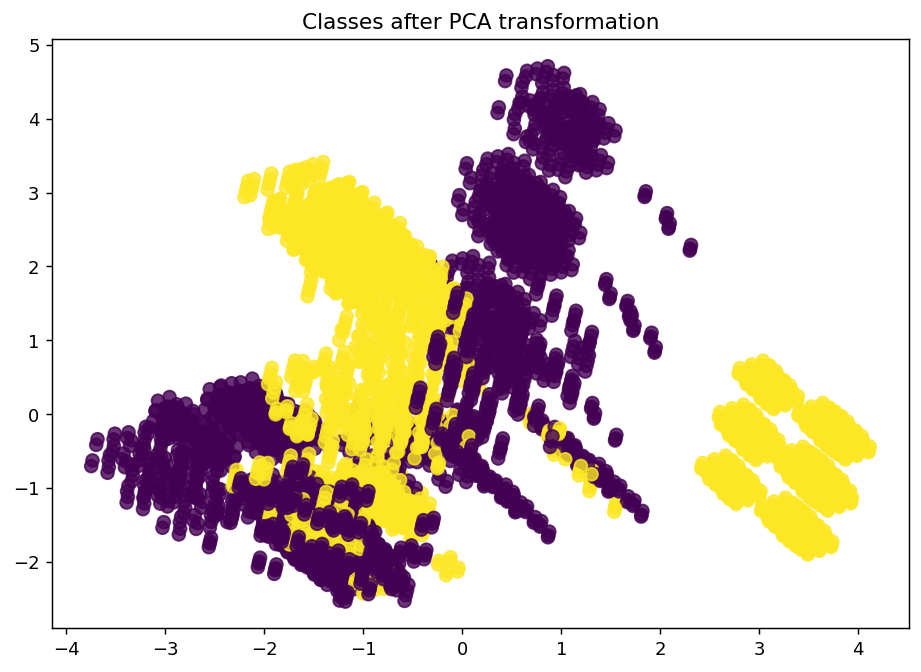

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Isolate the data we'll need for plotting.
x_component, y_component = transformed_mushroom[:, 0], transformed_mushroom[:, 1]

# Plot our dimensionality-reduced (via PCA) dataset.
plt.figure(figsize=(8.5, 6), dpi=130)
plt.scatter(x=x_component, y=y_component, c=y, cmap='viridis', s=50, alpha=8/10)
plt.title('Classes after PCA transformation')
plt.show()

In [ ]:
import itertools

In [ ]:
# Isolate our examples for our labeled dataset.
n_labeled_examples = X.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=20)

X_train = X[training_indices]
y_train = y[training_indices]


# Isolate the non-training examples we'll be querying.
X_pool = np.array(list(itertools.compress(X, [i not in training_indices for i in range(len(X_train))])))
y_pool = np.array(list(itertools.compress(y, [i not in training_indices for i in range(len(y_train))])))


In [ ]:
X_pool

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from modAL.models import ActiveLearner

# Specify our core estimator along with it's active learning model.
knn = KNeighborsClassifier(n_neighbors=3)
learner = ActiveLearner(estimator=knn, X_training=X_train, y_training=y_train)


In [ ]:
# Isolate the data we'll need for plotting.
predictions = learner.predict(X)
is_correct = (predictions == y)

predictions

array([1, 1, 1, ..., 0, 1, 0])

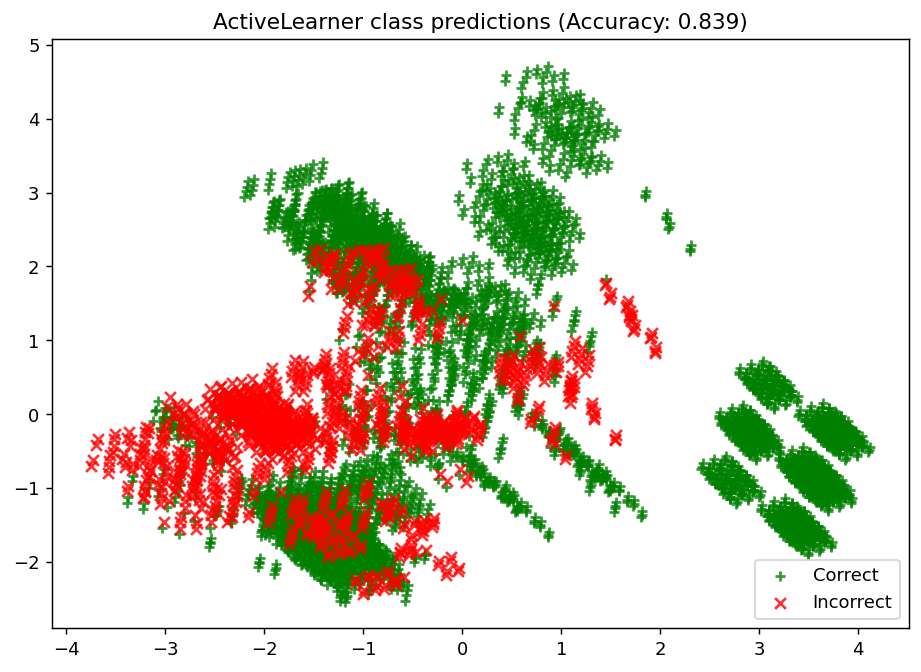

In [ ]:
# Record our learner's score on the raw data.
unqueried_score = learner.score(X, y)

# Plot our classification results.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)
ax.scatter(x=x_component[is_correct],  y=y_component[is_correct],  c='g', marker='+', label='Correct',   alpha=8/10)
ax.scatter(x=x_component[~is_correct], y=y_component[~is_correct], c='r', marker='x', label='Incorrect', alpha=8/10)
ax.legend(loc='lower right')
ax.set_title("ActiveLearner class predictions (Accuracy: {score:.3f})".format(score=unqueried_score))
plt.show()

In [ ]:
X_pool

array([[ 1.02971224,  0.14012794, -0.19824983,  1.18591657,  0.88193766,
         0.16289645, -0.43886364,  1.49468272, -0.22899776, -1.14480575,
         1.78146019,  0.68377765,  0.58638466,  0.62244139,  0.63199138,
         0.        ,  0.14203663, -0.25613174,  0.94808086, -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407,  1.18591657, -1.97031615,
         0.16289645, -0.43886364, -0.66903831, -0.22899776, -1.14480575,
         0.83898933,  0.68377765,  0.58638466,  0.62244139,  0.63199138,
         0.        ,  0.14203663, -0.25613174,  0.94808086, -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929,  1.18591657, -0.54418924,
         0.16289645, -0.43886364, -0.66903831,  0.05347685, -1.14480575,
         0.83898933,  0.68377765,  0.58638466,  0.62244139,  0.63199138,
         0.        ,  0.14203663, -0.25613174,  0.94808086, -0.2504706 ,
        -1.31310821,  0.86714922],
       [ 1.02971224

In [ ]:
N_QUERIES = 20
performance_history = [unqueried_score]

# Allow our model to query our unlabeled dataset for the most
# informative points according to our query strategy (uncertainty sampling).
for index in range(N_QUERIES):
  query_index, query_instance = learner.query(X_pool)

  # Teach our ActiveLearner model the record it has requested.
  X1, y1 = X_pool[query_index].reshape(1, -1), y_pool[query_index].reshape(1, )
  learner.teach(X=X1, y=y1)

  # Remove the queried instance from the unlabeled pool.
  X_pool, y_pool = np.delete(X_pool, query_index, axis=0), np.delete(y_pool, query_index)

  # Calculate and report our model's accuracy.
  model_accuracy = learner.score(X, y)
  print('Accuracy after query {n}: {acc:0.4f}'.format(n=index + 1, acc=model_accuracy))

  # Save our model's performance for plotting.
  performance_history.append(model_accuracy)


Accuracy after query 1: 0.8362
Accuracy after query 2: 0.8956
Accuracy after query 3: 0.9003
Accuracy after query 4: 0.8991
Accuracy after query 5: 0.8988
Accuracy after query 6: 0.8989
Accuracy after query 7: 0.8902
Accuracy after query 8: 0.8900
Accuracy after query 9: 0.8904
Accuracy after query 10: 0.8904
Accuracy after query 11: 0.8888
Accuracy after query 12: 0.8884
Accuracy after query 13: 0.8882
Accuracy after query 14: 0.8882
Accuracy after query 15: 0.8882
Accuracy after query 16: 0.8849
Accuracy after query 17: 0.8847
Accuracy after query 18: 0.8871
Accuracy after query 19: 0.8865
Accuracy after query 20: 0.8879


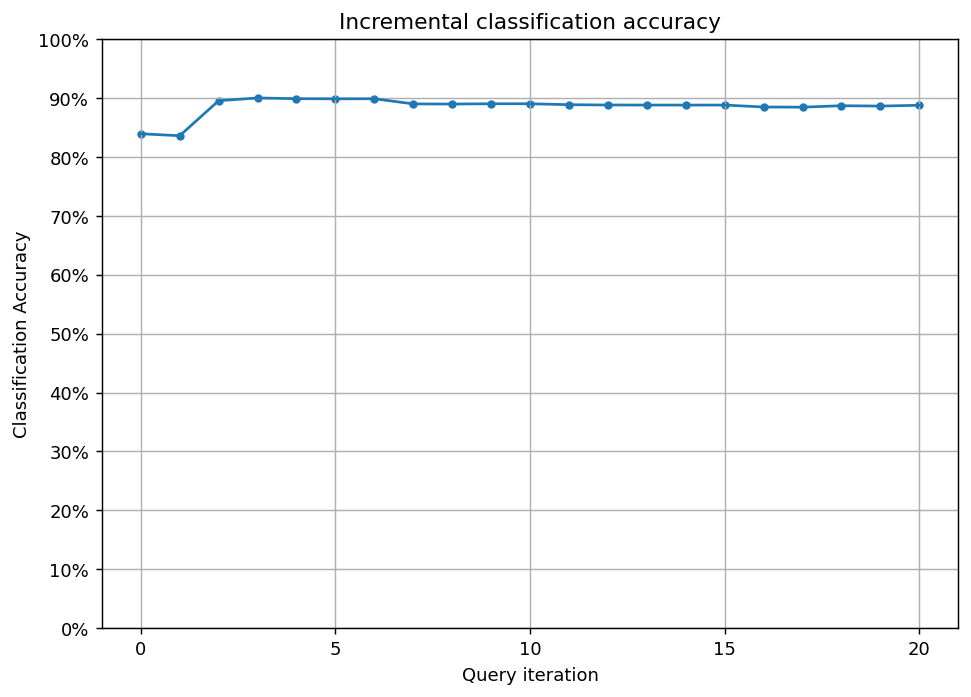

In [ ]:
# Plot our performance over time.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history)
ax.scatter(range(len(performance_history)), performance_history, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

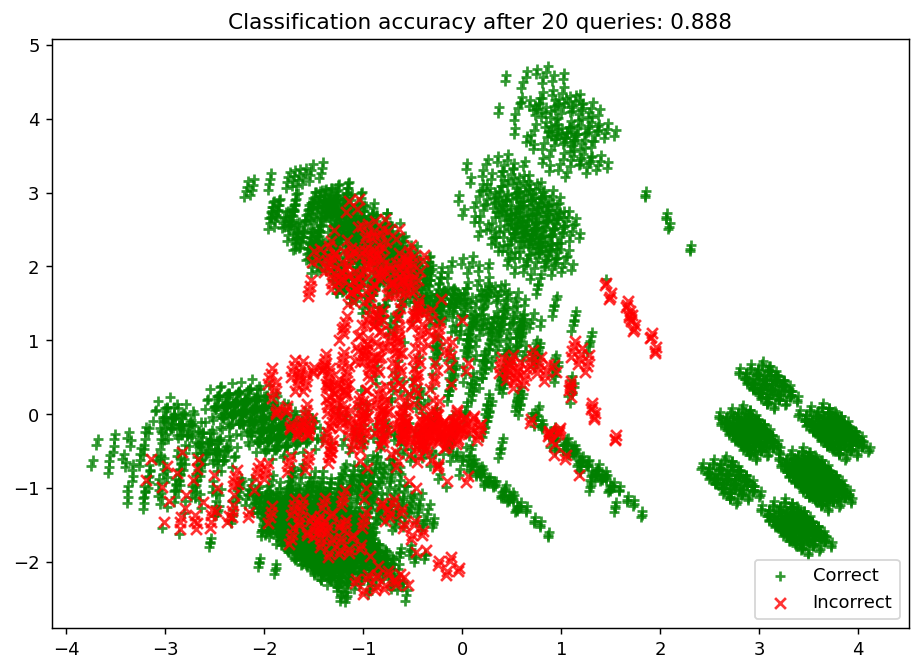

In [ ]:
# Isolate the data we'll need for plotting.
predictions = learner.predict(X)
is_correct = (predictions == y)

# Plot our updated classification results once we've trained our learner.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.scatter(x=x_component[is_correct],  y=y_component[is_correct],  c='g', marker='+', label='Correct',   alpha=8/10)
ax.scatter(x=x_component[~is_correct], y=y_component[~is_correct], c='r', marker='x', label='Incorrect', alpha=8/10)

ax.set_title('Classification accuracy after {n} queries: {final_acc:.3f}'.format(n=N_QUERIES, final_acc=performance_history[-1]))
ax.legend(loc='lower right')

plt.show()